Contains code from the Udemy Course "Complete Tensorflow 2 and Keras Deep Learning Bootcamp" by Jose Portilla.

In [4]:
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

from tqdm.keras import TqdmCallback # Cool progress bar instead of the lame line-by-line "progress bar" that comes by default with Keras.

print(tf.__version__)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

# To suppress annoying warnings.
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0) 

2.7.0
Device mapping: no known devices.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Keras Basics

## Data Loading

In [ ]:
file_path = '/content/drive/My Drive/neural-network-learning/Datasets/fake_reg.csv'
df = pd.read_csv(file_path)
df.head()

## Train-Test-Split & Scaling

In [ ]:
X = df[['feature1', 'feature2']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training/Fitting on Model

In [ ]:
model = Sequential([
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

model.compile(loss='mse')

model.fit(X_train, y_train, epochs=250, verbose=0, callbacks=[TqdmCallback(verbose=0)]);
pd.DataFrame(model.history.history).plot();

## Evaluation

### Test Set

In [ ]:
mse = model.evaluate(X_test, y_test, verbose=0)
print('MSE: ', round(mse, 2))

In [ ]:
predictions = pd.Series(model.predict(X_test).reshape(300,))
pred_df = pd.DataFrame(y_test).reset_index(drop=True)
pred_df = pd.concat([pred_df, predictions], axis=1)
pred_df.columns=['Actual', 'Prediction']
pred_df.head()

In [ ]:
mae = mean_absolute_error(pred_df['Actual'], pred_df['Prediction'])
mse = mean_squared_error(pred_df['Actual'], pred_df['Prediction'])

print('MAE: ', round(mae, 2))
print('MSE: ', round(mse, 2))

### New Data

In [ ]:
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

## Saving Model

If model doesn't load succesfully, add in the parameter `compile=False` to the `load_model()` function.

In [ ]:
model.save('Saved Models/gem_model.h5')
later_model = load_model('Saved Models/gem_model.h5', compile=False)
later_model.predict(new_gem)

# Keras Regression Code Along

## Data Loading

In [ ]:
file_path = '/content/drive/My Drive/neural-network-learning/Datasets/kc_house_data.csv'
df = pd.read_csv(file_path)
df.head()

## EDA

In [ ]:
df.describe().transpose()

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price']);

In [ ]:
sns.countplot(x=df['bedrooms']);

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df);

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='long', data=df);

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='lat', data=df);

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price');

In [ ]:
num_houses_1_percent = round(len(df) * 0.01)
num_houses_1_percent

In [ ]:
bottom_99_percent = df.sort_values('price', ascending=False).iloc[num_houses_1_percent:]
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='long',
    y='lat',
    data=bottom_99_percent,
    hue='price', 
    edgecolor='none',
    alpha=0.2,
    palette='RdYlGn'
);

In [ ]:
sns.boxplot(x='waterfront', y='price', data=df);

## Feature Selection/Engineering

In [ ]:
df = df.drop('id', axis=1, errors='ignore')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df);

In [ ]:
df.groupby('month').mean()['price'].plot();

In [ ]:
df = df.drop(columns=['date', 'zipcode'], errors='ignore')

In [ ]:
df['yr_renovated'].value_counts()

In [ ]:
df['sqft_basement'].value_counts()

## Data Preprocessing

In [ ]:
X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model & Prediction

In [ ]:
model = Sequential([
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=1000,
    verbose=0,
    callbacks=[TqdmCallback(verbose=0)]
) 
pd.DataFrame(model.history.history).plot();

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print('MSE ', round(mse, 2))
print('RMSE', round(np.sqrt(mse), 2))
print('MAE ', round(mae, 2))

In [ ]:
explained_variance_score(y_test, predictions)

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r');

In [ ]:
single_house = df.drop('price', axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))
model.predict(single_house)

# Keras Classification

## Data Loading

In [8]:
file_path = '/content/drive/My Drive/neural-network-learning/Datasets/cancer_classification.csv'
df = pd.read_csv(file_path)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## EDA

In [ ]:
sns.countplot(x='benign_0__mal_1', data=df);

In [ ]:
plt.figure(figsize=(10, 5))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar');

## Train/Test Split & Scaling

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Fitting

### Overfitting

0epoch [00:00, ?epoch/s]

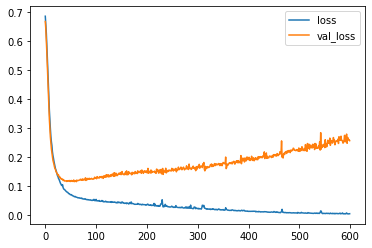

In [10]:
model = Sequential([
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=600,
    verbose=0,
    callbacks=[TqdmCallback(verbose=0)]
) 
pd.DataFrame(model.history.history).plot();

### Early Stopping

0epoch [00:00, ?epoch/s]

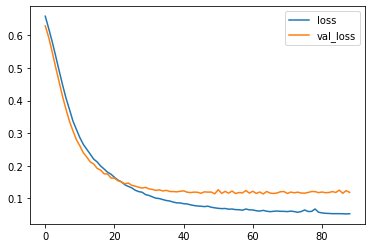

In [11]:
model = Sequential([
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

model.fit(
    X_train,
    y_train, 
    validation_data=(X_test, y_test),
    epochs=600,
    verbose=0,
    callbacks=[TqdmCallback(verbose=0), early_stop]
) 
pd.DataFrame(model.history.history).plot();

### Dropout Layer

0epoch [00:00, ?epoch/s]

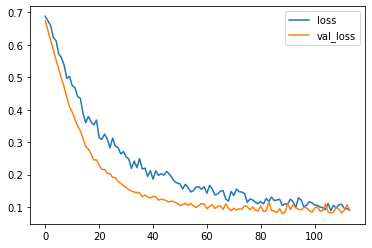

In [12]:
model = Sequential([
    Dense(30, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=600,
    verbose=0,
    callbacks=[TqdmCallback(verbose=0), early_stop]
) 
pd.DataFrame(model.history.history).plot();

## Evaluation

In [ ]:
predictions = model.predict_classes(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))